# Assignment #1

## Problem Setup

You will read three data files containing information about the location and the strength of a set of sources located on the surface of a NACA0012 airfoil. These files are NACA0012_x.txt, NACA0012_y.txt, and NACA0012_sigma.txt, and they should be found in the resources folder of the lessons.

Using 51 mesh points in each direction, and a domain $[−1,2]×[−0.5,0.5]$, compute the velocity due to the set of sources plus a free stream in the $x$-direction with $U_\infty = 1$. Also compute the coefficient of pressure on your grid points.

In [20]:
# valuables
import math
import numpy
from matplotlib import pyplot

# show plots inline 
%matplotlib inline

In [21]:
# mesh grid life
n = 51

xa,xz = -1, 2
ya,yz = -0.5,0.5

x = numpy.linspace(xa,xz,n)
y = numpy.linspace(ya,yz,n)

X,Y = numpy.meshgrid(x,y)

In [22]:
# freestream info
u_inf = 1.0

u_fs = u_inf * numpy.ones((n,n), dtype=float)
v_fs = u_inf * numpy.zeros((n,n), dtype=float)

psi_fs = u_inf * Y     # do i need stream function? 

In [23]:
# getvel function

def getvel(strength,xs,ys,X,Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Paremeters 
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the s/s.
    ys: float
        y-coordinate of the s/s.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
        
    Returns
    -------
    u: 2D numpy array of floats
        x-component of the vel vector field.
    v: 2D numpy array of floats
        y-component of the vel vector field.
    """
    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

def getstreamfunc(strength,xs,ys,X,Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [24]:
scully = numpy.loadtxt('NACA0012_x.txt')
mulder = numpy.loadtxt('NACA0012_y.txt')
wannabelieve = numpy.loadtxt('NACA0012_sigma.txt')

u_source = numpy.zeros((51,51))
v_source = numpy.zeros((51,51))
psi_source = numpy.zeros((51,51))

print("len scully: " + str(len(scully)))
print("len mulder: " + str(len(mulder)))
print("len wannabelieve: " + str(len(wannabelieve)))
print("len X: " + str(len(X)))
print("len Y: " + str(len(Y)))

len scully: 100
len mulder: 100
len wannabelieve: 100
len X: 51
len Y: 51


In [25]:
u_source = 0
v_source = 0
psi_source = 0

for i in range(0,100):
    strength = wannabelieve[i]
    xs = scully[i]
    ys = mulder[i]
    
    u, v = getvel(strength,xs,ys,X,Y)
    psi = getstreamfunc(strength,xs,ys,X,Y)
    u_source += u
    v_source += v
    psi_source += psi

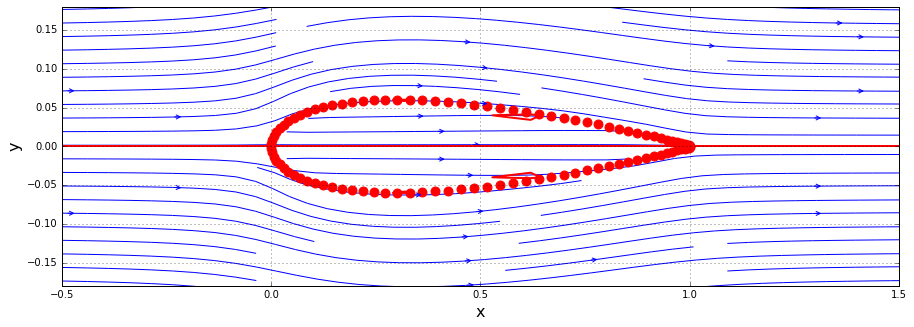

In [26]:
# superposition of the source on the freestream
u = u_fs + u_source
v = v_fs + v_source
psi = psi_fs + psi_source

# plot that mfing streamline 
size = 15
pyplot.figure(figsize=(size,size/3))
pyplot.grid(True)
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(min(scully)-0.5, max(scully)+0.5)
pyplot.ylim(-0.18, 0.18)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter(scully,mulder,color='red',s=80,marker='o')
pyplot.contour(X,Y,psi, levels=[0],colors='red',linewidths=2,linestyles='solid')

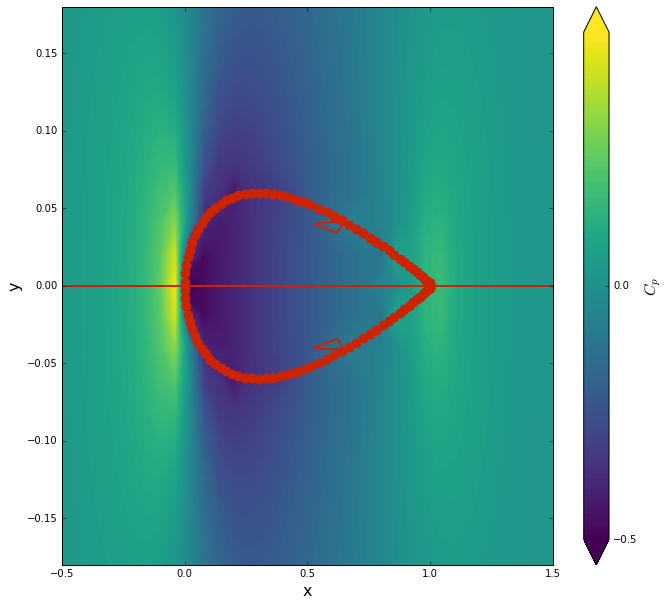

In [42]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2)/u_inf**2

# plot cp field
size = 10
pyplot.figure(figsize=(1.1*size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(min(scully)-0.5, max(scully)+0.5)
pyplot.ylim(-0.18, 0.18)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.5, 0.5, 100), extend='both',cmap='viridis')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$',fontsize=16)
cbar.set_ticks([-1.0, -0.5, 0.0, 1.0])
pyplot.scatter(scully, mulder, color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

In [48]:
value = numpy.amax(cp)
print('max cp value: \n' + str(value))
print('\nlocation of max cp value: ')
numpy.where(cp==value)

max cp value: 
0.471443661332

location of max cp value: 


(array([25]), array([16]))